In [1]:
import pandas as pd

headers = ['learner', 'target',  'consumed', 'hypo', 'sp', 'hip', 'hcp', 'opt', 'ns',
       'nt', 'whm', 'pi', 'tm', 'VtoI', 'ItoC', 'ah', 'QInv', ' ']

data = pd.read_csv('/tmp/out.csv', header=None, names=headers)

params = data.columns[4:-1]

In [2]:
self_or_super = dict((int(line.split(', ')[0]), 
      {int(x) for x in line.strip().split(',') if len(x)}) 
       for line in open('../data/all-supersets.csv'))

self_or_equiv = dict((int(line.split(', ')[0]), 
      {int(x) for x in line.strip().split(',') if len(x)}) 
       for line in open('../data/all-equivs.csv'))

def learned_equiv(series):
    return series.hypo in self_or_equiv[series.target]

def learned_super(series):
    return series.hypo in self_or_super[series.target]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 9, 5

In [4]:
data.groupby(['learner', 'target']).size()

learner                     target
RewardOnlyRelevant[equiv]   584       20
                            611       20
                            2253      20
                            3856      20
RewardOnlyRelevant[normal]  584       20
                            611       20
                            2253      20
                            3856      20
RewardOnlyRelevant[super]   584       20
                            611       20
                            2253      20
                            3856      20
RewardOnlyVL                584       20
                            611       20
                            2253      20
                            3856      20
dtype: int64

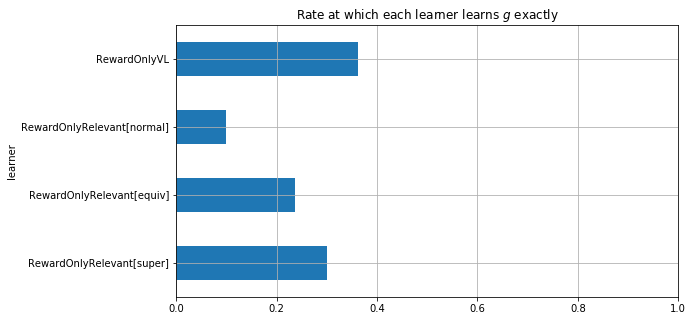

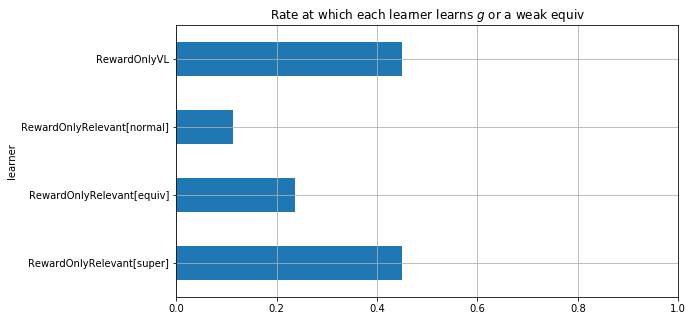

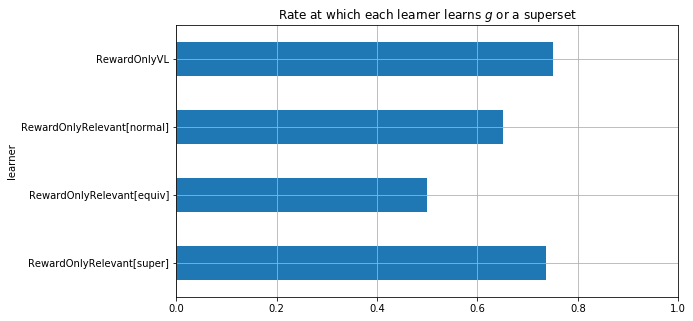

In [5]:
data['learned_exact'] = data.target.eq(data.hypo)

data['learned_equiv'] = data.apply(learned_equiv, axis=1)

data['learned_super'] = data.apply(learned_super, axis=1)

index = [ 
       'RewardOnlyRelevant[super]', 'RewardOnlyRelevant[equiv]', 'RewardOnlyRelevant[normal]', 'RewardOnlyVL']

exact = data.groupby(['learner']).learned_exact.value_counts().unstack()
exact[True].div(exact.sum(axis=1))[index].plot.barh();
plt.title('Rate at which each learner learns $g$ exactly');
plt.grid()
plt.xlim(0, 1)
plt.show()

exact = data.groupby(['learner']).learned_equiv.value_counts().unstack()
exact[True].div(exact.sum(axis=1))[index].plot.barh();
plt.title('Rate at which each learner learns $g$ or a weak equiv');
plt.grid()
plt.xlim(0, 1)
plt.show()

exact = data.groupby(['learner']).learned_super.value_counts().unstack()
exact[True].div(exact.sum(axis=1))[index].plot.barh();
plt.title('Rate at which each learner learns $g$ or a superset');
plt.xlim(0, 1)
plt.grid()
plt.show()

In [6]:
x = (data
[data.learned_super.eq(False)]
 .groupby(['learner', 'target', 'hypo'])
 .size()
)
x[x.index[::-1]]

learner                     target  hypo
RewardOnlyVL                2253    2893    1
                                    2892    4
                                    2829    5
                                    2828    4
                                    2637    1
                                    2636    1
                                    2573    3
                                    2572    1
RewardOnlyRelevant[super]   2253    2893    8
                                    2892    3
                                    2829    4
                                    2828    3
                                    2637    1
                                    2572    1
                            611     553     1
RewardOnlyRelevant[normal]  3856    3866    8
                            2253    2893    4
                                    2892    4
                                    2829    8
                                    2828    4
RewardOnlyRelevant[equiv]   2253    289

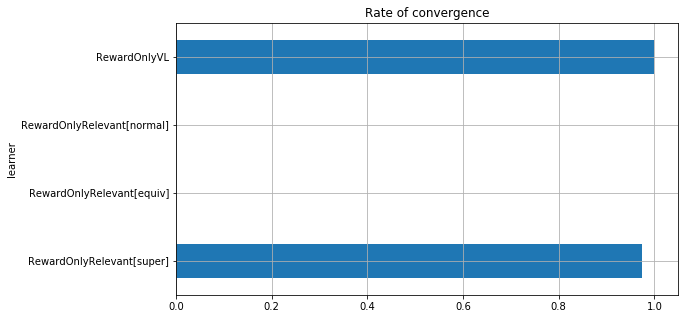

In [7]:
data['converged'] = data[params].apply(lambda x: abs(0.5 - x) >= 0.48).all(axis=1)
converged = data.groupby('learner').converged.value_counts().unstack()
converged[True].div(converged.sum(axis=1))[index].plot.barh()
plt.title('Rate of convergence')
plt.grid();

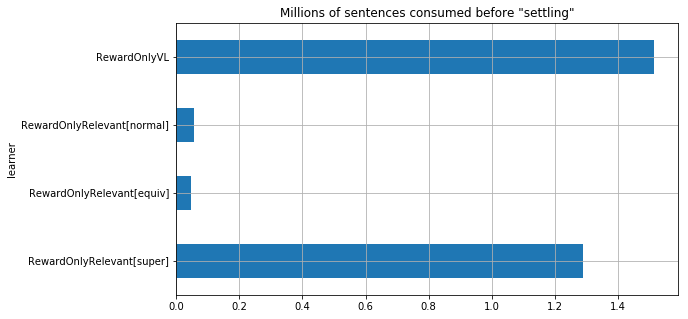

In [8]:
data[data.consumed.lt(data.consumed.max())].groupby('learner').consumed.mean()[index].div(1000000).plot.barh()
plt.title('Millions of sentences consumed before "settling"')
plt.grid()